In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [3]:
sales = pd.read_csv('supermarket_sales - Sheet1.csv')

In [10]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019


In [6]:
sales['date'] = pd.to_datetime(sales['Date'])
print(type(sales['date']))
sales['date'].dtype

<class 'pandas.core.series.Series'>


dtype('<M8[ns]')

In [9]:
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [11]:
sales['Time'] = pd.to_datetime(sales['Time'])

C:\Users\Struggler\AppData\Local\Temp\ipykernel_8704\721023929.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Time'] = pd.to_datetime(sales['Time'])


In [12]:
sales['Hour'] = (sales['Time']).dt.hour

In [13]:
sales['Hour'].nunique()

11

In [14]:
sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [15]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2024-08-13 15:24:41.880000,307.58738,4.761905,15.379369,6.97270,2019-02-14 00:05:45.600000,15.256000,1.993000,2019.0,14.910000
min,10.080000,1.000000,0.508500,10.678500,2024-08-13 10:00:00,10.17000,4.761905,0.508500,4.00000,2019-01-01 00:00:00,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2024-08-13 12:43:00,118.49750,4.761905,5.924875,5.50000,2019-01-24 00:00:00,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2024-08-13 15:19:00,241.76000,4.761905,12.088000,7.00000,2019-02-13 00:00:00,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2024-08-13 18:15:00,448.90500,4.761905,22.445250,8.50000,2019-03-08 00:00:00,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2024-08-13 20:59:00,993.00000,4.761905,49.650000,10.00000,2019-03-30 00:00:00,31.000000,3.000000,2019.0,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858,NaN,8.693563,0.835254,0.0,3.186857


In [16]:
#find the number of unique values in columns with object datatype
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype =="object"]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [18]:
print("#unique values in branch :{0}".format(len(sales['Branch'].unique().tolist())))
print("#unique values in city :{0}".format(len(sales['City'].unique().tolist())))
print("#unique values in customer type :{0}".format(len(sales['Customer type'].unique().tolist())))
print("#unique values in gender :{0}".format(len(sales['Gender'].unique().tolist())))
print("#unique values in product line :{0}".format(len(sales['Product line'].unique().tolist())))
# print("#unique values in Date :{0}".format(len(sales['Date'].unique().tolist())))
print("#unique values in Payment :{0}".format(len(sales['Payment'].unique().tolist())))

#unique values in branch :3
#unique values in city :3
#unique values in customer type :2
#unique values in gender :2
#unique values in product line :6
#unique values in Date :89
#unique values in Payment :3


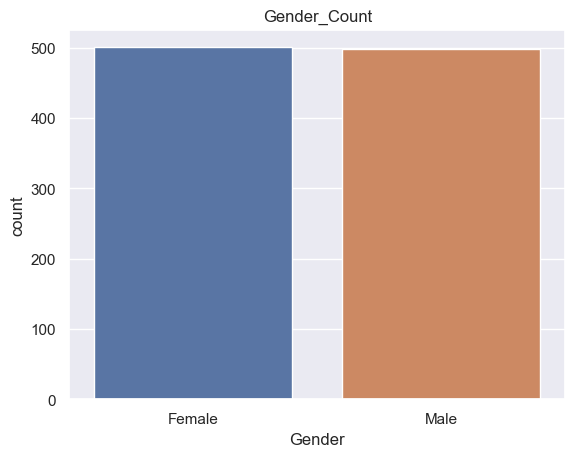

In [19]:
sns.set(style="darkgrid")       #style the plot background to become a grid
genderCount  = sns.countplot(x="Gender", data =sales).set_title("Gender_Count")

Text(0.5, 1.0, 'Ratings by Branch')

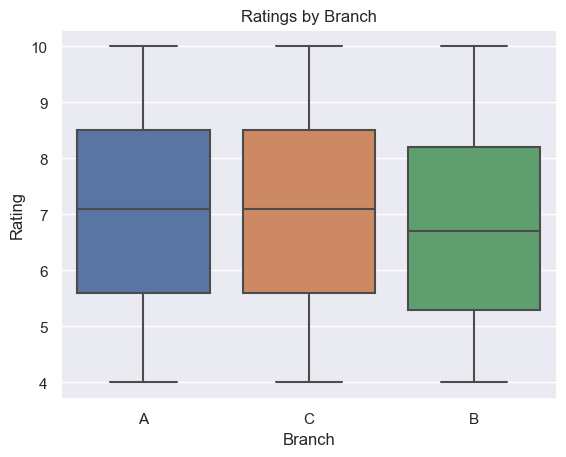

In [20]:
sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch") 
# so basically A and C are better branches

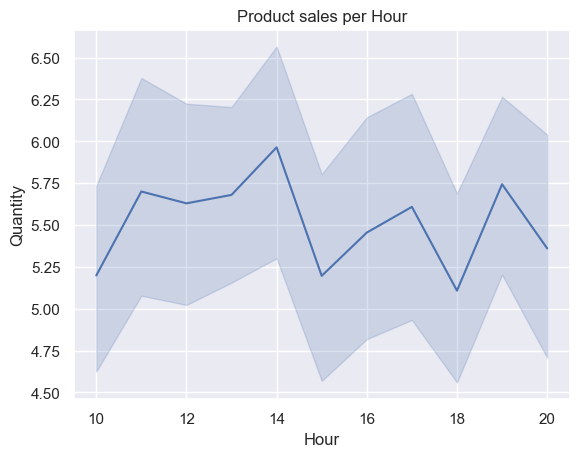

In [21]:
genderCount = sns.lineplot(x="Hour" , y="Quantity",data = sales).set_title("Product sales per Hour")

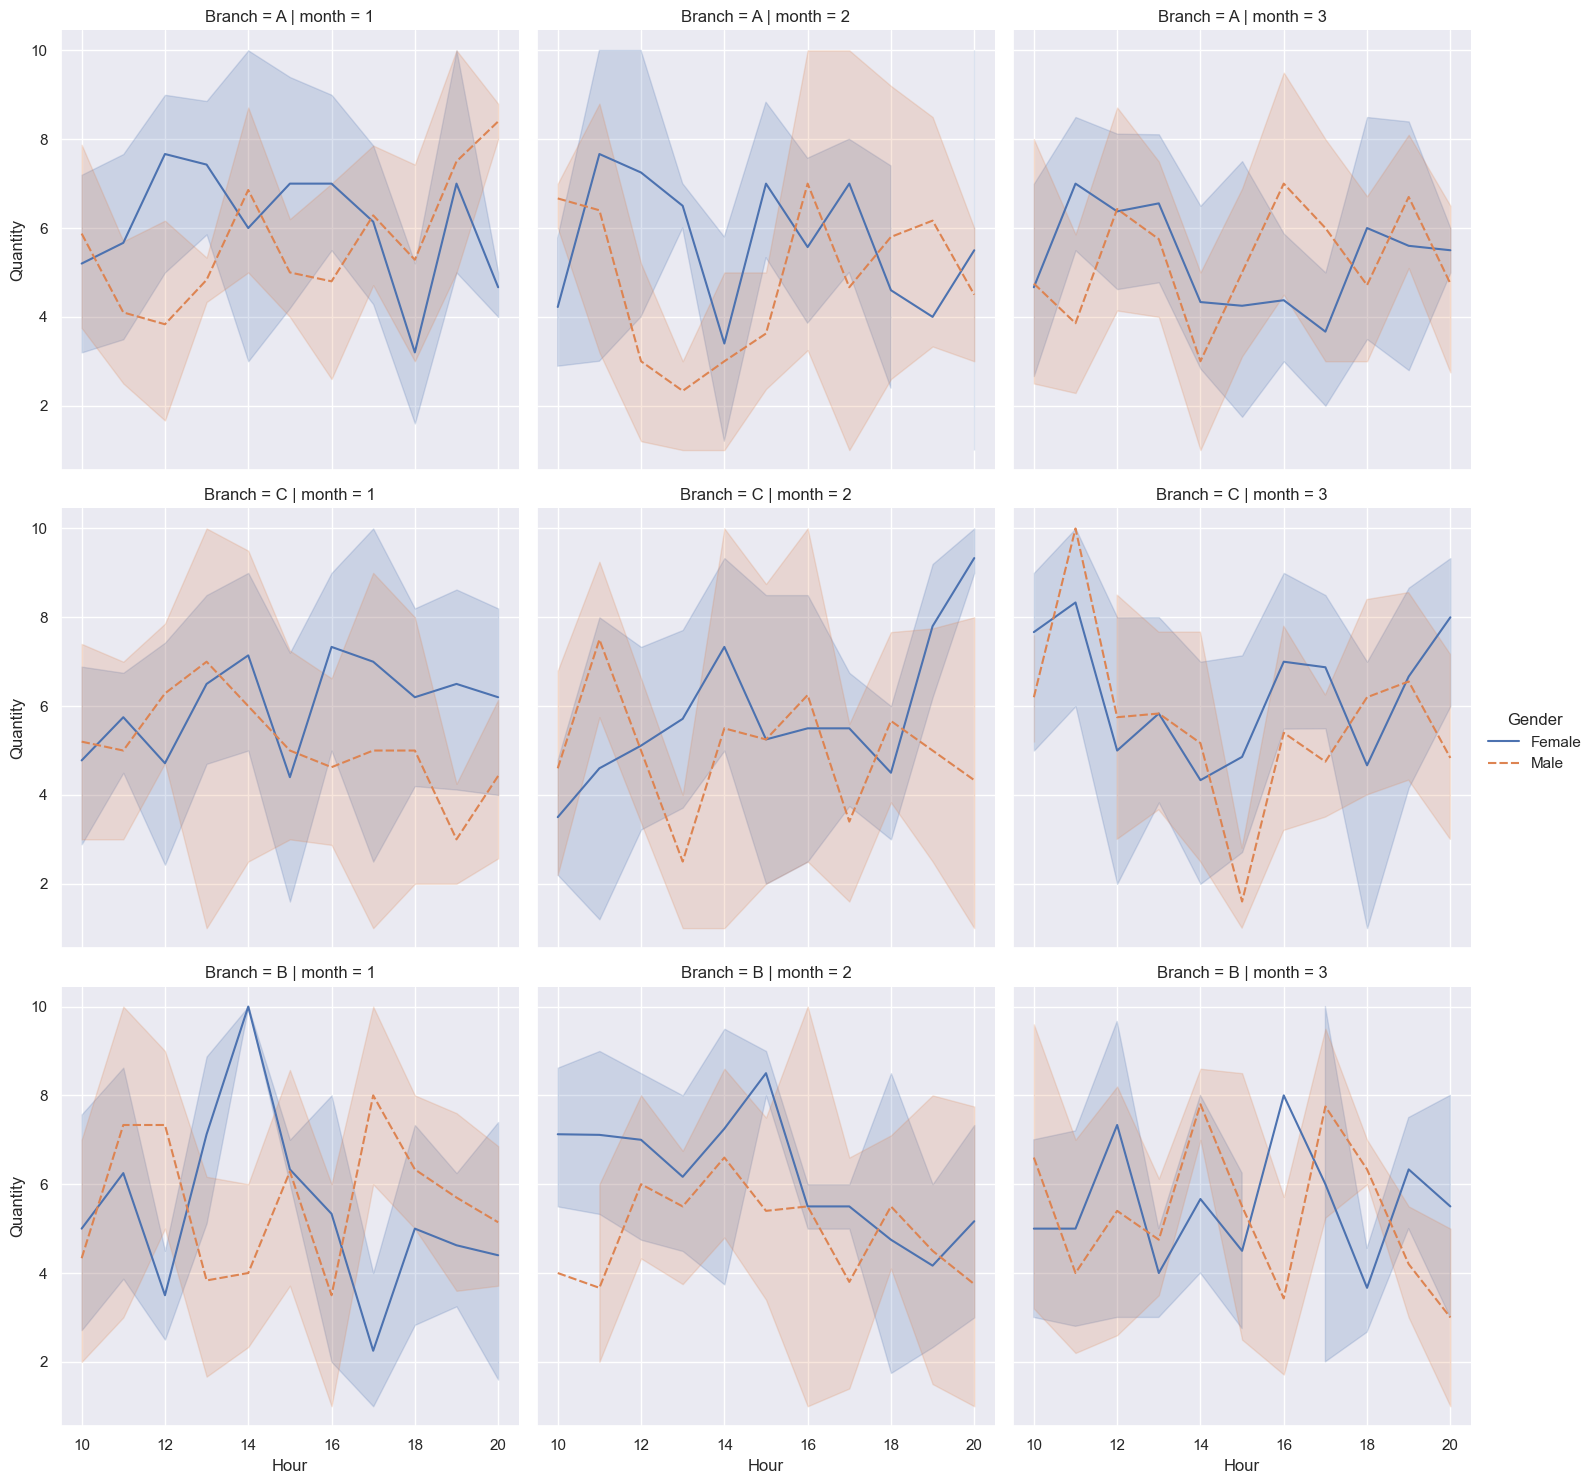

In [22]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', 
                           col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =sales)